# IMPLEMENTASI ALGORITMA K-MEANS DENGAN PRINCIPAL COMPONENT ANALYSIS PADA SEGMENTASI PELANGGAN APLIKASI STARBUCKS BERDASARKAN INDIKATOR FREQUENCY, MONETARY, DAN TENURE - EDA (bit.ly/alfianhid_program_skripsi_1)

## Daftar Isi

### [Bagian I: Library dan Data]
### [Bagian II: Praproses Data]
  ##### [1. Data yang kosong]
  ##### [2. Ekstraksi data]
  ##### [3. Konversi ID string menjadi ID numerik]
  ##### [4. Periksa data yang kosong lagi]
  ##### [5. Tipe data]
  ##### [6. Data yang terduplikasi]
### [Bagian III: Exploratory Data Analysis - Offers]
  ##### [1. Berapa banyak offers dari tiap tipe dikirimkan?]
  ##### [2. Berapa banyak reward offers yang diselesaikan?]
  ##### [3. Berapa banyak informational offers diikuti dengan sebuah transaksi?]
  ##### [4. Tipe offers yang mana yang memiliki completion rate tertinggi?]
### [Bagian IV: Exploratory Data Analysis - Users]
  ##### [1. Bagaimana distribusi demografi pengguna?]
  ##### [2. Apakah ada pola pada user spending?]
  ##### [3. Apakah ada pola demografi pada offer completion?]
### [Bagian V: Ringkasan]

## Permasalahan Bisnis

Ini adalah masalah segmentasi pelanggan untuk berbagai jenis iklan di aplikasi Starbucks. Pelanggan merespons secara berbeda terhadap berbagai jenis promosi, sehingga tidak ada satu jenis promosi yang terbaik untuk semua pelanggan. Dengan pemahaman yang lebih baik tentang perilaku pelanggan, Starbucks akan dapat mengoptimalkan strategi iklan yang dikirim ke pelanggan mereka.

Tujuan dari proyek ini adalah untuk mengklaster kelompok demografis berdasarkan bagaimana pelanggan merespons dengan baik jenis penawaran yang mereka terima. Proyek ini juga akan memprediksi apakah seorang pelanggan akan merespons sebuah tawaran atau tidak.

## Data

#### Deskripsi

Dataset ini berisi data yang menyerupai perilaku pelanggan di aplikasi Starbucks. Ini adalah dataset versi sederhana dari aplikasi Starbucks yang disimulasikan memiliki satu produk sedangkan Starbucks sebenarnya menjual banyak jenis produk.

Setiap beberapa hari sekali, Starbucks mengirimkan penawaran kepada pengguna aplikasi Starbucks. Penawaran dapat berupa iklan minuman atau penawaran seperti diskon atau BOGO (Buy One Get One). Beberapa pengguna mungkin tidak menerima penawaran apa pun selama berminggu-minggu, dan tidak semua pengguna menerima penawaran yang sama.

Setiap penawaran memiliki masa berlaku sebelum penawaran berakhir. Sebagai contoh, penawaran BOGO mungkin hanya berlaku selama 5 hari. Dalam dataset, penawaran informasional memiliki masa berlaku meskipun iklan tersebut hanya memberikan informasi tentang suatu produk. Misalnya, jika penawaran informasional memiliki masa berlaku 7 hari, diasumsikan bahwa pelanggan dapat terpengaruh oleh penawaran tersebut selama 7 hari setelah menerima iklan.

#### Contoh

Seorang pengguna menerima penawaran beli produk dengan total 10 dolar dan dapatkan diskon 2 dolar pada hari Senin. Penawaran ini berlaku selama 10 hari sejak penawaran diterima. Jika pelanggan bertransaksi setidaknya 10 dolar selama masa berlaku penawaran, maka pelanggan dihitung telah menyelesaikan penawaran.

Pelanggan tidak memiliki opsi untuk tidak ikut serta dalam penawaran yang mereka terima; dengan kata lain, pengguna tetap menerima penawaran, meskipun tidak pernah melihat penawaran tersebut, namun tetap memiliki kemungkinan untuk menyelesaikan penawaran tersebut. Misalnya, pengguna menerima penawaran "beli 10 dolar dan dapatkan diskon 2 dolar", tetapi pengguna tidak pernah membuka penawaran selama masa berlaku 10 hari. Pelanggan menghabiskan 15 dolar selama masa berlaku sepuluh hari itu. Akan ada catatan penyelesaian penawaran dalam dataset; namun pelanggan tidak terpengaruh oleh penawaran karena pelanggan tidak pernah melihat penawaran tersebut.

#### Skema Data

**portfolio.json** (10 baris x 6 kolom) - metadata untuk setiap penawaran (durasi, jenis, dll)
* id (str) - offer ID
* offer_type (str) - jenis penawaran (BOGO, discount, informational)
* difficulty (int) - minimum pembelian untuk menyelesaikan penawaran
* reward (int) - reward yang diberikan untuk menyelesaikan penawaran
* duration (int) - waktu untuk penawaran dilihat, dalam satuan hari
* channels (list[str]) - jenis media untuk penawaran (web, email, mobile, social)

**profile.json** (17,000 baris x 5 kolom) - data demografis untuk setiap pengguna
* age (int) - usia pelanggan (nilai yang kosong dikodekan dengan 118)
* became_member_on (int) - tanggal ketika pelanggan mendaftar ke aplikasi
* gender (str) - jenis kelamin pelanggan (Female, Male, Others)
* id (str) - customer ID
* income (float) - pendapatan pelanggan

**transcript.json** (306,534 baris x 4 kolom)- catatan peristiwa (transaksi, penawaran diterima, penawaran dilihat, dan penawaran diselesaikan)
* event (str) - deskripsi catatan (transaksi, penawaran diterima, penawaran dilihat, dan penawaran diselesaikan)
* person (str) - customer ID
* time (int) - waktu dalam satuan jam sejak dimulainya peristiwa (data dimulai dengan t = 0)
* value - (dict) - antara offer ID atau jumlah transaksi (tergantung pada catatan)

## Bagian I: Library dan data

In [ ]:
# Impor Library yang digunakan
import json
import numpy as np
import pandas as pd

import plotly.graph_objs as go
import plotly.subplots as subplots
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('mode.chained_assignment', None)
%matplotlib inline
sns.set()

In [ ]:
# Data Profiling
portfolio = pd.read_json('https://raw.githubusercontent.com/alfianhid/Starbucks-EDA-and-Customer-Segmentation-with-K-means-Algorithm/master/data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('https://raw.githubusercontent.com/alfianhid/Starbucks-EDA-and-Customer-Segmentation-with-K-means-Algorithm/master/data/profile.json', orient='records', lines=True)
transcript = pd.read_json('https://raw.githubusercontent.com/alfianhid/Starbucks-EDA-and-Customer-Segmentation-with-K-means-Algorithm/master/data/transcript.json', orient='records', lines=True)

print(portfolio.shape)
print(profile.shape)
print(transcript.shape)

(10, 6)
(17000, 5)
(306534, 4)


In [ ]:
print(portfolio.info())
portfolio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes
None


,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [ ]:
print(profile.info())
profile.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB
None


,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [ ]:
print(transcript.info())
transcript.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB
None


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


## Bagian II: Praproses Data

### 1. Data yang kosong

In [ ]:
# fungsi untuk mengetahui data yang kosong
def show_missing_values(df, encoded_col=None, encoded_val=None):
    
    '''
    Show the number and proportion of missing values in every column of a dataframe.
    
    Args:
        (1) df (Pandas dataframe) - data to inspect
        (2) encoded_col (str) - name of column with missing values encoded *
        (3) encoded_val (str or int or float) - value that was used to encoded missing values *
        * Pass in args (2) and (3) if a column had its missing values encoded
        
    Returns:
        Dataframe showing number and proportion of missing values in each column (Pandas dataframe).
    '''
    
    missing = df.isnull().sum().reset_index() # jumlah data yang kosong
    missing.columns = ['column', 'n_missing']
    
    if encoded_col: # jika data yang kosong adalah kolom yang telah dikodekan
        missing.loc[missing.column == encoded_col, 'n_missing'] = (df[encoded_col] == encoded_val).sum()
        
    missing['pct_missing'] = np.round(100 * missing.n_missing / df.shape[0], 2) # persentase data yang kosong
    return missing

In [ ]:
# Hanya data pengguna yang memiliki nilai yang kosong
show_missing_values(profile, 'age', 118) # nilai `age` yang kosong telah dikodekan dengan angka 118

,column,n_missing,pct_missing
0,gender,2175,12.79
1,age,2175,12.79
2,id,0,0.00
3,became_member_on,0,0.00
4,income,2175,12.79


In [ ]:
# Periksa apakah semua nilai yang kosong berasal dari baris yang sama
profile[profile.age == 118].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 16994
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            0 non-null      object 
 1   age               2175 non-null   int64  
 2   id                2175 non-null   object 
 3   became_member_on  2175 non-null   int64  
 4   income            0 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 102.0+ KB


##### 2175 pengguna tidak memasukkan informasi apa pun saat mendaftar, sehingga data yang kosong pada kolom `gender`, `age`, dan `income` berasal dari mereka. Meskipun 12,79% bukan persentase yang kecil, akan lebih baik jika memiliki lebih sedikit data daripada mengkaitkan nilai-nilai kosong ini dan memiliki data yang tidak valid.

In [ ]:
# Hapus pengguna dengan data yang kosong
missing_users = profile.loc[profile.gender.isnull(), 'id'].values # pengguna yang akan dihapus
missing_user_events = transcript[transcript.person.isin(missing_users)].index.values # event ID yang berkaitan dengan pengguna juga akan dihapus

transcript.drop(missing_user_events, inplace=True) # hapus event
profile.dropna(inplace=True) # hapus pengguna

print(profile.shape)
print(transcript.shape)

(14825, 5)
(272762, 4)


### 2. Ekstraksi data

In [ ]:
# fungsi untuk mendapatkan nilai yang unik
def get_unique_values(df_col, type_dict=False):
    
    '''
    Get the unique values of a dataframe column with lists or the unique keys of a column with dictionaries.
    
    Args:
        (1) df_col (Pandas series) - dataframe column with iterable values
        (2) type_dict (bool) - True if value type is dictionary or False if value type is list
        
    Returns:
        Unique values from column iterables (list[str]).
    '''
    
    if type_dict: # untuk tipe data dictionary
        df_col = df_col.apply(lambda d: list(d.keys())) # mendapatkan lists of keys
    return np.unique(np.concatenate(df_col.values)).tolist() # mendapatkan unique values

In [ ]:
# fungsi untuk mengekstraksi kolom secara iteratif
def extract_from_iterable_col(df, old_col, drop_old_col=True, unique_values=None, unique_keys=None):
    
    '''
    Extract data into new columns from a column with iterable values like lists or dictionaries.
    If extracting from dictionaries, the new column names will be the dictionary keys and the
    values will be dictionary values. If extracting from lists, one-hot encode the list values.
    
    Args:
        (1) df (Pandas dataframe) - data containing a column with iterable values
        (2) old_col (str) - name of column to extract data from
        (3) drop_old_col (bool) - whether or not to drop the old column after extracting data from it
        (4) unique_vals (list[str]) - pass in unique values if data type of column is list *
        (5) unique_vals (list[str]) - pass in unique keys if data type of column is dictionary *
        * Pass in arg (4) for a list column or arg (5) for a dictionary column
        
    Returns:
        Same data with new columns extracted from the old column (Pandas dataframe).
    '''
    
    df = df.copy()
    
    if unique_keys is not None: # untuk tipe data dictionary
        for k in unique_keys:
            if ' ' not in k: # untuk melompati key yang terduplikasi dengan spasi
                df[k] = df[old_col].apply(lambda d: d[k] if k in d # mendapatkan nilai dari dictionary
                                          else (d[k.replace('_', ' ')] if k.replace('_', ' ') in d # untuk key yang terduplikasi dengan spasi
                                                else np.NaN)) # nilai NaN (Not a Number) jika key tidak ada dalam dictionary
        
    elif unique_values is not None: # untuk tipe data lists
        for v in unique_values:
            new_col = df[old_col].apply(lambda lst: int(v in lst)) # 1 jika nilai dalam list selain 0
            if np.var(new_col): # jika kolom baru tidak bernilai konstan
                df[v] = new_col # tambah kolom baru

    if drop_old_col:
        df.drop(old_col, axis=1, inplace=True)
        
    return df

In [ ]:
# Mendapatkan unique values
channels = get_unique_values(portfolio.channels) # unique channel values dari dataset portfolio
offer_keys = get_unique_values(transcript.value, type_dict=True) # unique offer keys dari dataset transcript

print("Unique values dari dataset portfolio:", channels)
print("Unique values dari dataset transcript:", offer_keys)

Unique values dari dataset portfolio: ['email', 'mobile', 'social', 'web']
Unique values dari dataset transcript: ['amount', 'offer id', 'offer_id', 'reward']


In [ ]:
# Ekstraksi channels dari dataset portfolio
portfolio = extract_from_iterable_col(portfolio, 'channels', unique_values=channels)
portfolio.head()

,reward,difficulty,duration,offer_type,id,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,1


In [ ]:
# Ekstraksi nilai dictionary dari dataset transcript
transcript = extract_from_iterable_col(transcript, 'value', unique_keys=offer_keys)
transcript.head()

,person,event,time,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
5,389bc3fa690240e798340f5a15918d5c,offer received,0,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,NaN,3f207df678b143eea3cee63160fa8bed,NaN
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN


### 3. Konversi ID string menjadi ID numerik

In [ ]:
# Urutkan jenis penawaran berdasarkan tingkat kesulitan: informational < discount < BOGO
portfolio.sort_values(['offer_type', 'difficulty', 'duration'], ascending=[False, True, False], inplace=True)
portfolio.reset_index(drop=True, inplace=True)
portfolio.head()

,reward,difficulty,duration,offer_type,id,mobile,social,web
0,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,0,1
1,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,0
2,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1
3,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1
4,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,0,1


In [ ]:
# fungsi untuk membuat mapping dictionary
def create_map_dict(series):
    
    '''
    Create a mapping of unique hash strings of a dataframe column to integers.
    
    Args:
        series (Pandas series) - dataframe column with hash strings
        
    Returns:
        Mapping of unique hash strings to integers (dict)
    '''
    
    ids, idn = dict(), 1
    for s in series.unique():
        ids[s] = idn
        idn += 1
    return ids

In [ ]:
# fungsi untuk mapping ID string ke numerik
def map_ids_to_num(series, map_dict):
    
    '''
    Map ID hash strings of a dataframe column to integers.
    
    Args:
        (1) series (Pandas series) - dataframe column to map
        (2) map_dict (dict) - mapping with hash strings as keys and integers as values
        
    Returns:
        Dataframe column with values mapped to integers (Pandas series).
    '''
    
    return series.map(map_dict)

In [ ]:
# Membuat mapping untuk offer ID dan user ID
offer_mapping = create_map_dict(portfolio.id)
user_mapping = create_map_dict(profile.id)

len(offer_mapping)
len(user_mapping)

14825

In [ ]:
# Konversi offer ID dalam offer metadata menjadi numerik
portfolio['offer_id'] = map_ids_to_num(portfolio.id, offer_mapping)
portfolio.drop('id', axis=1, inplace=True)
portfolio

,reward,difficulty,duration,offer_type,mobile,social,web,offer_id
0,0,0,4,informational,1,0,1,1
1,0,0,3,informational,1,1,0,2
2,3,7,7,discount,1,1,1,3
3,2,10,10,discount,1,1,1,4
4,2,10,7,discount,1,0,1,5
5,5,20,10,discount,0,0,1,6
6,5,5,7,bogo,1,0,1,7
7,5,5,5,bogo,1,1,1,8
8,10,10,7,bogo,1,1,0,9
9,10,10,5,bogo,1,1,1,10


In [ ]:
# Konversi user ID dalam user data menjadi numerik
profile['user_id'] = map_ids_to_num(profile.id, user_mapping)
profile.drop('id', axis=1, inplace=True)
profile.head()

,gender,age,became_member_on,income,user_id
1,F,55,20170715,112000.0,1
3,F,75,20170509,100000.0,2
5,M,68,20180426,70000.0,3
8,M,65,20180209,53000.0,4
12,M,58,20171111,51000.0,5


In [ ]:
# Konversi offer ID dan user ID dalam event data menjadi numerik
transcript['offer_id'] = map_ids_to_num(transcript.offer_id, offer_mapping)
transcript['user_id'] = map_ids_to_num(transcript.person, user_mapping)
transcript.drop('person', axis=1, inplace=True)
transcript.head()

,event,time,amount,offer_id,reward,user_id
0,offer received,0,NaN,7.0,NaN,2
2,offer received,0,NaN,5.0,NaN,3
5,offer received,0,NaN,8.0,NaN,4
7,offer received,0,NaN,1.0,NaN,5
8,offer received,0,NaN,6.0,NaN,6


### 4. Periksa data yang kosong Lagi

In [ ]:
# Data yang kosong dalam event data (dataset transcript)
show_missing_values(transcript)

,column,n_missing,pct_missing
0,event,0,0.00
1,time,0,0.00
2,amount,148805,54.55
3,offer_id,123957,45.45
4,reward,240318,88.11
5,user_id,0,0.00


In [ ]:
# Perhitungan nilai yang kosong untuk setiap jenis peristiwa
print('Perhitungan peristiwa (event) secara keseluruhan:')
print(transcript.event.value_counts())

for e in transcript.event.unique():
    print(f'\nNilai yang kosong untuk peristiwa (event): ', e)
    print(transcript[transcript.event == e].isnull().sum().iloc[2:5])

Perhitungan peristiwa (event) secara keseluruhan:
transaction        123957
offer received      66501
offer viewed        49860
offer completed     32444
Name: event, dtype: int64

Nilai yang kosong untuk peristiwa (event):  offer received
amount      66501
offer_id        0
reward      66501
dtype: int64

Nilai yang kosong untuk peristiwa (event):  offer viewed
amount      49860
offer_id        0
reward      49860
dtype: int64

Nilai yang kosong untuk peristiwa (event):  transaction
amount           0
offer_id    123957
reward      123957
dtype: int64

Nilai yang kosong untuk peristiwa (event):  offer completed
amount      32444
offer_id        0
reward          0
dtype: int64


##### Tidak ada masalah dengan nilai yang kosong di sini:
- Untuk peristiwa "offer received" dan "offer viewed": tidak ada transaksi yang dilakukan sehingga tidak ada `amount` dan tidak ada reward yang diberikan sehingga `reward` kosong
- Untuk peristiwa "offer completed": tidak ada transaksi yang dilakukan sehingga tidak ada `amount`
- Untuk peristiwa "transaction": tidak ada penawaran yang sesuai dengan transaksi sehingga tidak ada `offer_id` dan `reward`

##### Karena nilai-nilai ini sebenarnya bukan nilai yang kosong, saya akan mengisi semuanya dengan nilai 0 agar data tetap valid.

In [ ]:
# Isi nilai yang kosong dengan angka 0
transcript.fillna(0, inplace=True)
transcript.isnull().sum().sum() # semua kolom terisi data

0

### 5. Tipe data

In [ ]:
# Periksa tipe data
print(portfolio.info())
print(profile.info())
print(transcript.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   difficulty  10 non-null     int64 
 2   duration    10 non-null     int64 
 3   offer_type  10 non-null     object
 4   mobile      10 non-null     int64 
 5   social      10 non-null     int64 
 6   web         10 non-null     int64 
 7   offer_id    10 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 768.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   became_member_on  14825 non-null  int64  
 3   income            14825 non-null  float64
 4   user_id           14825 non-null  int64  
dt

In [ ]:
# Kolom yang akan dikonversi menjadi tipe data integer
profile['income'] = profile.income.astype(int) # `income` dalam user data

transcript['offer_id'] = transcript.offer_id.astype(int) # `offer_id` dalam event data
transcript['reward'] = transcript.reward.astype(int) # `reward` dalam event data
transcript.head()

,event,time,amount,offer_id,reward,user_id
0,offer received,0,0.0,7,0,2
2,offer received,0,0.0,5,0,3
5,offer received,0,0.0,8,0,4
7,offer received,0,0.0,1,0,5
8,offer received,0,0.0,6,0,6


In [ ]:
# Konversi `became_member_on` dalam user data menjadi tipe data datetime dan ubah nama kolom menjadi `signup_date`
profile['signup_date'] = pd.to_datetime(profile.became_member_on.astype(str))
profile.drop('became_member_on', axis=1, inplace=True)
profile.head()

,gender,age,income,user_id,signup_date
1,F,55,112000,1,2017-07-15
3,F,75,100000,2,2017-05-09
5,M,68,70000,3,2018-04-26
8,M,65,53000,4,2018-02-09
12,M,58,51000,5,2017-11-11


### 6. Data yang terduplikasi

In [ ]:
print('Jumlah pengguna yang terduplikasi:', profile.duplicated().sum())
print('Jumlah peristiwa (event) yang terduplikasi:', transcript.duplicated().sum())

Jumlah pengguna yang terduplikasi: 0
Jumlah peristiwa (event) yang terduplikasi: 374


In [ ]:
# Peristiwa yang terduplikasi
dup_events = transcript[transcript.duplicated(keep=False)]
dup_events

,event,time,amount,offer_id,reward,user_id
66122,offer completed,168,0.0,5,2,1271
66123,offer completed,168,0.0,5,2,1271
66782,offer completed,168,0.0,9,10,3872
66783,offer completed,168,0.0,9,10,3872
67613,offer completed,168,0.0,7,5,7462
...,...,...,...,...,...,...
304756,offer completed,708,0.0,6,5,6340
305550,offer completed,714,0.0,4,2,2041
305551,offer completed,714,0.0,4,2,2041
306455,offer completed,714,0.0,6,5,13967


In [ ]:
# Jenis peristiwa (event) yang terduplikasi
dup_events.event.value_counts()

offer completed    747
Name: event, dtype: int64

##### Semua dari 374 peristiwa yang terduplikasi adalah `offer completed`. Tidak mungkin bahwa pengguna yang sama menyelesaikan jenis penawaran yang sama dalam jam yang sama, sehingga data duplikat ini akan dihapus. Bahkan jika itu benar-benar terjadi, hal ini hanya sebagian kecil dari keseluruhan data peristiwa. Jadi kehilangan data tersebut tidak akan menjadi masalah yang besar.

In [ ]:
# Hapus data duplikat
transcript.drop_duplicates(inplace=True)
transcript.duplicated().sum() # semua data duplikat telah dihapus

0

## Bagian III: Exploratory Data Analysis - Offers

### 1. Berapa banyak offers dari tiap tipe dikirimkan?

In [ ]:
# fungsi untuk memfilter peristiwa (event)
def filter_for_events(event_list, event_df=transcript, event_col='event', 
                     cols_to_keep=['event', 'time', 'offer_id', 'user_id', 'amount'],
                     merge_with=None, merge_on=None):
    
    '''
    Filter the event data for specified events and optionally perform a left merge
    with the offer metadata or user data.
    
    Args:
        (1) event_list (list[str]) - events to filter for
        (2) event_df (Pandas df) - event data
        (3) event_col (str) - name of event type column
        (4) cols_to_keep (list[str]) - columns to keep in the filtered dataframe
        (5) merge_with (Pandas dataframe) - offer metadata or user data
        (6) merge_on (str) - column to merge on
        
    Returns:
        Filtered event data containing only the specified events (Pandas dataframe)
    '''
    
    filtered_event = event_df.loc[event_df[event_col].isin(event_list), cols_to_keep].reset_index()
    
    if merge_with is not None:
        filtered_event = pd.merge(filtered_event, merge_with, on=merge_on, how='left')
        
    return filtered_event

In [ ]:
# Filter untuk peristiwa "offer received" dan lakukan left-join dengan dataset portfolio
received_offers = filter_for_events(['offer received'], cols_to_keep=['time', 'user_id', 'offer_id'],
                                   merge_with=portfolio, merge_on='offer_id')

print(f'Total sebanyak {received_offers.shape[0]} offers telah dikirimkan kepada {received_offers.user_id.nunique()} pengguna.\n')
received_offers.head()

Total sebanyak 66501 offers telah dikirimkan kepada 14820 pengguna.



,index,time,user_id,offer_id,reward,difficulty,duration,offer_type,mobile,social,web
0,0,0,2,7,5,5,7,bogo,1,0,1
1,2,0,3,5,2,10,7,discount,1,0,1
2,5,0,4,8,5,5,5,bogo,1,1,1
3,7,0,5,1,0,0,4,informational,1,0,1
4,8,0,6,6,5,20,10,discount,0,0,1


In [ ]:
# Konversi jam ke hari
received_offers['day'] = received_offers.time // 24
received_offers.day.value_counts()

24    11165
17    11124
14    11080
7     11061
21    11048
0     11023
Name: day, dtype: int64

In [ ]:
print('Jumlah peristiwa "offers received" berdasarkan tipe:', f'\n{received_offers.offer_type.value_counts()}')
print('\nJumlah peristiwa "offers received" berdasarkan offer ID:', f'\n{received_offers.offer_id.value_counts()}')

Jumlah peristiwa "offers received" berdasarkan tipe: 
discount         26664
bogo             26537
informational    13300
Name: offer_type, dtype: int64

Jumlah peristiwa "offers received" berdasarkan offer ID: 
6     6726
7     6685
9     6683
1     6657
3     6655
4     6652
2     6643
5     6631
10    6593
8     6576
Name: offer_id, dtype: int64


##### Penawaran dikirim secara merata pada hari-hari yang berbeda. 10 penawaran berbeda dikirim secara berimbang. Tetapi karena ada 4 penawaran diskon, 4 penawaran BOGO, dan hanya 2 penawaran informasional, ada sekitar dua kali lebih banyak penawaran diskon dan penawaran BOGO dibandingkan penawaran informasional.

### 2. Berapa banyak reward offers yang diselesaikan?

Saya menggunakan istilah "reward offers" untuk merujuk pada penawaran diskon dan BOGO. Penawaran informasional akan dipertimbangkan secara terpisah di subbagian berikutnya karena tidak ada peristiwa "completion" untuk penawaran informasional.

Saya akan membuat dua fitur biner (`viewed` dan `completed`) untuk menunjukkan apakah penawaran telah dilihat dan diselesaikan. Dua fitur ini akan membantu saya dalam mengelompokkan penawaran yang telah dikirimkan ke pengguna. Ada empat kemungkinan yang bisa terjadi pada pengguna setiap kali mereka menerima tawaran:
1. Pengguna tidak melihat maupun menyelesaikan penawaran: grup ini akan memiliki nilai 0 untuk kedua fitur
2. Pengguna melihat, tapi tidak menyelesaikan penawaran: grup ini akan memiliki nilai 1 untuk `viewed` dan nilai 0 untuk `completed`
3. Pengguna menyelesaikan penawaran, tapi melihatnya setelah penawaran selesai atau tidak pernah melihatnya: grup ini akan memiliki nilai 0 untuk `viewed` dan nilai 1 untuk `completed`
    - Beberapa pengguna melihat penawaran SETELAH menyelesaikannya sehingga kasus ini akan diperlakukan seolah-olah tidak pernah dilihat
4. Pengguna melihat dan menyelesaikan penawaran: grup ini akan memiliki nilai 1 untuk kedua fitur

\* Catatan: ada kasus di mana pengguna menyelesaikan penawaran tanpa terlebih dahulu melihat penawaran tersebut. Dengan kata lain, para pengguna ini tidak tahu tentang tawaran itu dan tetap membelanjakan uangnya. Oleh karena itu, penyelesaian ini tidak akan dihitung untuk proyek ini. Jadi penawaran hanya selesai jika dilihat terlebih dahulu (yaitu pengguna tahu tentang penawaran tersebut).

In [ ]:
# Filter untuk peristiwa reward offers
offer_events = filter_for_events(['offer received', 'offer viewed', 'offer completed'],
                                 merge_with=portfolio, merge_on='offer_id')
offer_events = offer_events.query('offer_type != "informational"') # drop informational offers
offer_events.shape

(125771, 13)

In [ ]:
offer_events.head()

,index,event,time,offer_id,user_id,amount,reward,difficulty,duration,offer_type,mobile,social,web
0,0,offer received,0,7,2,0.0,5,5,7,bogo,1,0,1
1,2,offer received,0,5,3,0.0,2,10,7,discount,1,0,1
2,5,offer received,0,8,4,0.0,5,5,5,bogo,1,1,1
4,8,offer received,0,6,6,0.0,5,20,10,discount,0,0,1
5,9,offer received,0,6,8,0.0,5,20,10,discount,0,0,1


In [ ]:
def concat_str_cols(df, cols, sep='_', pref='', suff=''):
    
    '''
    Concatenate the string values of multiple columns.
    
    Args:
        (1) df (Pandas dataframe) - data
        (2) cols (list[str]) - names of columns to concatenate
        (3) sep (str or list[str]) - separator between columns
        (4) pref (str) - string to prepend to the final values
        (5) suff (str) - string to append to the final values
        
    Returns:
        Column with concatenated strings (Pandas series).
    '''
    
    if isinstance(sep, str):
        sep = [sep] * (len(cols) - 1) + [suff]
        
    new_col = pref
    for i in range(len(cols)):
        new_col += df[cols[i]].astype(str) + sep[i]
    return new_col

In [ ]:
# Tambahkan waktu kedaluwarsa
offer_events['expire_time'] = offer_events.apply(lambda e: e.duration * 24 + e.time if e.event == 'offer received' else -1, axis=1)

# Satukan offer ID and user ID untuk mengelompokkan penawaran
offer_events['oid_uid'] = concat_str_cols(offer_events, ['offer_id', 'user_id'])
offer_events = offer_events.sort_values(['oid_uid', 'index']).reset_index(drop=True)
offer_events.head()

,index,event,time,offer_id,user_id,amount,reward,difficulty,duration,offer_type,mobile,social,web,expire_time,oid_uid
0,91,offer received,0,10,100,0.0,10,10,5,bogo,1,1,1,120,10_100
1,15575,offer viewed,6,10,100,0.0,10,10,5,bogo,1,1,1,-1,10_100
2,151484,offer received,408,10,1000,0.0,10,10,5,bogo,1,1,1,528,10_1000
3,182714,offer viewed,444,10,1000,0.0,10,10,5,bogo,1,1,1,-1,10_1000
4,185051,offer completed,450,10,1000,0.0,10,10,5,bogo,1,1,1,-1,10_1000


In [ ]:
# fungsi untuk mengisi nilai
def fill_with(view_val, comp_val, rows_to_fill, off_evt_df=offer_events, view_col='viewed', comp_col='completed'):
    
    '''
    Fill specified rows of the new binary features in the offer event data with 1 if yes or 0 if no. For offers being
    viewed, the fill value is 1 only if the offer was viewed BEFORE it was completed, otherwise it is 0
    
    Args:
        (1) view_val (int) - 1 if the offer was viewed, else 0
        (2) comp_val (int) - 1 if the offer was completed, else 0
        (3) rows_to_fil (list[int]) - indices of rows to fill
        (4) off_evt_df (Pandas dataframe) - offer event data
        (5) view_col (str) - name of binary column indicating whether the offer was viewed
        (6) comp_col (str) - name of binary column indicating whether the offer was completed
        
    Returns: None
    '''
    
    for row in rows_to_fill:
        if view_val in [0, 1]:
            off_evt_df.loc[row, view_col] = view_val
        if comp_val in [0, 1]:
            off_evt_df.loc[row, comp_col] = comp_val

In [ ]:
# fungsi untuk menuju ke event yang dimaksud            
def go_to_event(curr_idx, delta=1, event_df=offer_events):
    
    '''
    Move from the current event index to another event index.
    Example: if delta is -1, go to the previous index
             if delta is 1, go to the next index
    
    Args:
        (1) curr_idx (int) - current index
        (2) delta (int) - change in index
        (3) event_df (Pandas dataframe) - event data
        
    Returns:
        (1) Index of new event (int).
        (2) New event (Pandas series) if index within range
            or index (int) if out of range
    '''
    
    next_idx = next_evt = curr_idx + delta
    if 0 <= next_idx < event_df.shape[0]:
        next_evt = event_df.iloc[next_idx]
    return next_idx, next_evt

In [ ]:
# Buat fitur biner untuk menunjukkan apakah penawaran telah dilihat dan diselesaikan
offer_events['viewed'] = -1
offer_events['completed'] = -1
offer_events.head()

,index,event,time,offer_id,user_id,amount,reward,difficulty,duration,offer_type,mobile,social,web,expire_time,oid_uid,viewed,completed
0,91,offer received,0,10,100,0.0,10,10,5,bogo,1,1,1,120,10_100,-1,-1
1,15575,offer viewed,6,10,100,0.0,10,10,5,bogo,1,1,1,-1,10_100,-1,-1
2,151484,offer received,408,10,1000,0.0,10,10,5,bogo,1,1,1,528,10_1000,-1,-1
3,182714,offer viewed,444,10,1000,0.0,10,10,5,bogo,1,1,1,-1,10_1000,-1,-1
4,185051,offer completed,450,10,1000,0.0,10,10,5,bogo,1,1,1,-1,10_1000,-1,-1


In [ ]:
# Isi nilai `viewed` dan `completed`
for idx, ids, evt in offer_events[['oid_uid', 'event']].itertuples():
    if idx + 2 < offer_events.shape[0] and evt == 'offer received': # peristiwa saat ini: offer received
        evt2, evt3 = offer_events.iloc[idx + 1], offer_events.iloc[idx + 2] # dua peristiwa selanjutnya
        
        if evt2.oid_uid == ids and evt2.event == 'offer viewed':
            if evt3.oid_uid == ids and evt3.event == 'offer completed': # dua peristiwa selanjutnya: offer viewed, offer completed
                fill_with(1, 1, [idx, idx + 1, idx + 2])
            else: # dua peristiwa selanjutnya: offer viewed, offer received atau offer viewed
                fill_with(1, 0, [idx, idx + 1])
                
        elif evt2.oid_uid == ids and evt2.event == 'offer completed':
            if evt3.oid_uid == ids and evt3.event == 'offer viewed': # dua peristiwa selanjutnya: offer completed, offer viewed
                fill_with(0, 1, [idx, idx + 1, idx + 2])
            else: # dua peristiwa selanjutnya: offer completed, offer received atau offer completed
                fill_with(0, 1, [idx, idx + 1])
                
        else: # peristiwa selanjutnya: "offer received"
            fill_with(0, 0, [idx])
            
    # Jika suatu peristiwa tidak diisi, itu karena ada dau peristiwa penyelesaian berturut-turut tanpa "received" atau "viewed" di antaranya
    elif offer_events.loc[idx, 'viewed'] < 0:
        
        if evt == 'offer viewed': # peristiwa saat ini: offer viewed
            fill_with(0, 1, [idx]) 
        
        if evt == 'offer completed': # peristiwa saat ini: offer completed
            # Kembali 3 baris unuk peristiwa 0
            idx0, evt0 = go_to_event(idx, -3)
            fill_viewed = True

            # Ulangi secara mundur peristiwa 0 untuk menemukan penawaran yang dimiliki oleh penyelesaian ini
            while not isinstance(evt0, int) and evt0.oid_uid == ids: # lanjutkan sampai ID berubah

                if evt0.completed < 1:
                    if evt0.event == 'offer viewed' and fill_viewed: # peristiwa 0: offer viewed
                        fill_with(-1, 1, [idx0])
                        fill_viewed = False
                    if evt0.event == 'offer received': # peristiwa 0: offer received
                        fill_with(-1, 1, [idx0])
                        fill_with(evt0.viewed, 1, [idx]) 
                        break

                idx0, evt0 = go_to_event(idx0, -1) # kembali satu baris

In [ ]:
print('Jumlah peristiwa yang tidak diisi:', offer_events.query('viewed < 0 or completed < 0').shape[0])
offer_events.head()

Jumlah peristiwa yang tidak diisi: 0


,index,event,time,offer_id,user_id,amount,reward,difficulty,duration,offer_type,mobile,social,web,expire_time,oid_uid,viewed,completed
0,91,offer received,0,10,100,0.0,10,10,5,bogo,1,1,1,120,10_100,1,0
1,15575,offer viewed,6,10,100,0.0,10,10,5,bogo,1,1,1,-1,10_100,1,0
2,151484,offer received,408,10,1000,0.0,10,10,5,bogo,1,1,1,528,10_1000,1,1
3,182714,offer viewed,444,10,1000,0.0,10,10,5,bogo,1,1,1,-1,10_1000,1,1
4,185051,offer completed,450,10,1000,0.0,10,10,5,bogo,1,1,1,-1,10_1000,1,1


In [ ]:
# fungsi untuk mengelompokkan penawaran
def group_offer(event_row, viewed_col='viewed', completed_col='completed'):
    
    '''
    Helper function to assign a group label to an offer-related event.
    Group 1: offers that were neither viewed or completed
    Group 2: offers that were viewed, but not completed
    Group 3: offers that were completed, but not viewed
    Group 4: offers that were both viewed and completed
    
    Args:
        (1) event_row (Pandas Series) - row in event data
        (2) viewed_col (str) - name of `viewed` binary column
        (3) completed_col (str) - name of `completed` binary column
        
    Returns:
        Group number the offer belongs to (int).
    '''
    
    if event_row[viewed_col] == 0 and event_row[completed_col] == 0:
        return 1
    if event_row[viewed_col] == 1 and event_row[completed_col] == 0:
        return 2
    if event_row[viewed_col] == 0 and event_row[completed_col] == 1:
        return 3
    if event_row[viewed_col] == 1 and event_row[completed_col] == 1:
        return 4

In [ ]:
# Tambahkan fitur `group` untuk mengelompokkan penawaran seperti yang dijelaskan di atas
offer_events['group'] = offer_events.apply(group_offer, axis=1)
offer_events.head()

,index,event,time,offer_id,user_id,amount,reward,difficulty,duration,offer_type,mobile,social,web,expire_time,oid_uid,viewed,completed,group
0,91,offer received,0,10,100,0.0,10,10,5,bogo,1,1,1,120,10_100,1,0,2
1,15575,offer viewed,6,10,100,0.0,10,10,5,bogo,1,1,1,-1,10_100,1,0,2
2,151484,offer received,408,10,1000,0.0,10,10,5,bogo,1,1,1,528,10_1000,1,1,4
3,182714,offer viewed,444,10,1000,0.0,10,10,5,bogo,1,1,1,-1,10_1000,1,1,4
4,185051,offer completed,450,10,1000,0.0,10,10,5,bogo,1,1,1,-1,10_1000,1,1,4


In [ ]:
# fungsi untuk plotting
def show_group_count(event_df, plot_counts=True):
    
    '''
    Print a summary of offer groups and optionally plot a stacked horizonal bar chart of offer group counts.
    
    Args:
        (1) event_df (Pandas dataframe) - event data
        (2) plot_counts (bool) - whether to plot the offer group couunts
        
    Returns: None.
    '''
    
    # Total penawaran yang diterima dan diselesaikan
    received_offers = event_df.query('event == "offer received"')
    completed_offers = received_offers.query('completed == 1')
    print('Total penawaran yang dikirimkan:', received_offers.shape[0])
    print('Penawaran yang diselesaikan:', completed_offers.shape[0])
    print('Penawaran yang tidak selesai:', received_offers.shape[0] - completed_offers.shape[0])

    # Jumlah penawaran di setiap grup
    group_count = received_offers.group.value_counts()
    print('\n(Group 1) Penawaran yang tidak dilihat dan tidak diselesaikan:', group_count[1])
    print('(Group 2) Penawaran yang dilihat, tapi tidak diselesaikan:', group_count[2])
    print('(Group 3) Penawaran yang diselesaikan, tapi tidak dilihat:', group_count[3])
    print('(Group 4) Penawaran yang dilihat dan diselesaikan:', group_count[4])
    
    # Plotting
    if plot_counts:
        data = [go.Bar(x=[group_count[1], group_count[3]],
                       y=['Penawaran tidak selesai', 'Penawaran diselesaikan'],
                       name='Tidak dilihat', orientation='h'),
                go.Bar(x=[group_count[2], group_count[4]],
                       y=['Penawaran tidak selesai', 'Penawaran diselesaikan'],
                       name='Dilihat', orientation='h')]
        go.Figure(data=data, layout=go.Layout(barmode='stack',
                                              title='Perbandingan Tiap Group Penawaran',
                                              xaxis=dict(title='Jumlah Penawaran'))).show()

In [ ]:
# Menampilkan jumlah penawaran di setiap grup
print('Reward Offers')
print('-------------')
show_group_count(offer_events)

Reward Offers
-------------
Total penawaran yang dikirimkan: 53201
Penawaran yang diselesaikan: 32070
Penawaran yang tidak selesai: 21131

(Group 1) Penawaran yang tidak dilihat dan tidak diselesaikan: 7165
(Group 2) Penawaran yang dilihat, tapi tidak diselesaikan: 13966
(Group 3) Penawaran yang diselesaikan, tapi tidak dilihat: 9688
(Group 4) Penawaran yang dilihat dan diselesaikan: 22382


##### Dari 21.131 penawaran yang tidak diselesaikan, 7.165 (sekitar sepertiga) bahkan tidak dilihat. Dari 32.070 penawaran selesai yang tercatat, hanya 22.382 penawaran yang benar-benar selesai; penawaran dilihat terlebih dahulu sebelum diselesaikan. Sisanya 9.688 penawaran "completed" tidak dapat benar-benar dianggap selesai karena penawaran tersebut diselesaikan tanpa pengguna melihat penawaran atau melihat penawaran setelah penawaran itu selesai. Entah pengguna menyadari atau tidak penawaran itu dan menghabiskan uang tanpa memedulikan penawaran. 9.688 penawaran ini juga tidak dapat dianggap tidak selesai, sehingga kemungkinan besar akan dipisahkan.

### 3. Berapa banyak penawaran informasional yang diikuti oleh sebuah transaksi?

Karena penawaran informasional tidak memberikan reward apa pun dan tidak ada "completion" sehingga ini dikalkulasikan dengan sedikit berbeda. Ada penawaran informasional dengan durasi yang berbeda, yang diasumsikan sebagai jumlah hari di mana iklan memberikan pengaruh pada pelanggan setelah melihatnya. Saya akan melihat penawaran mana yang diikuti dengan transaksi (memiliki jumlah minimum pembelian) dalam durasi penawaran.

In [ ]:
# Filter untuk penawaran informasional, merge dengan dataset portfolio, dan mengisi nilai kosong dengan angka -1
info_events = filter_for_events(['offer received', 'offer viewed', 'transaction'],
                                merge_with=portfolio, merge_on='offer_id').fillna(-1)
info_events = info_events[info_events.offer_id.isin([0, 1, 2])] # menghapus reward offers

# Konversi kolom metadata ke tipe data integer
for col in ['reward', 'difficulty', 'duration', 'mobile', 'social', 'web']:
    info_events[col] = info_events[col].astype(int)

info_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146617 entries, 3 to 240317
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       146617 non-null  int64  
 1   event       146617 non-null  object 
 2   time        146617 non-null  int64  
 3   offer_id    146617 non-null  int64  
 4   user_id     146617 non-null  int64  
 5   amount      146617 non-null  float64
 6   reward      146617 non-null  int64  
 7   difficulty  146617 non-null  int64  
 8   duration    146617 non-null  int64  
 9   offer_type  146617 non-null  object 
 10  mobile      146617 non-null  int64  
 11  social      146617 non-null  int64  
 12  web         146617 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 15.7+ MB


In [ ]:
# Hapus transaksi pengguna yang tidak menerima penawaran informasional
users_with_info_offers = info_events.query('event != "transaction"').user_id.unique()
info_events = info_events[info_events.user_id.isin(users_with_info_offers)]
info_events.shape

(98029, 13)

In [ ]:
# Tambahkan waktu kedaluwarsa (durasi dimulai ketika penawaran dilihat)
info_events['expire_time'] = info_events.apply(lambda e: -1 if e.event == 'transaction' else e.duration * 24 + e.time, axis=1)

# Gabungkan offer ID dan user ID untuk mengelompokkan penawaran
info_events['oid_uid'] = concat_str_cols(info_events, ['offer_id', 'user_id'])
info_events = info_events.sort_values(['user_id', 'index']).reset_index(drop=True)

info_events.head()

,index,event,time,offer_id,user_id,amount,reward,difficulty,duration,offer_type,mobile,social,web,expire_time,oid_uid
0,20282,transaction,18,0,1,21.51,-1,-1,-1,-1,-1,-1,-1,-1,0_1
1,49501,transaction,144,0,1,32.28,-1,-1,-1,-1,-1,-1,-1,-1,0_1
2,201571,offer received,504,1,1,0.00,0,0,4,informational,1,0,1,600,1_1
3,227842,transaction,528,0,1,23.22,-1,-1,-1,-1,-1,-1,-1,-1,0_1
4,47582,transaction,132,0,2,19.89,-1,-1,-1,-1,-1,-1,-1,-1,0_2


In [ ]:
# Buat fitur biner untuk menunjukkan apakah penawaran telah dilihat dan diselesaikan
info_events['viewed'] = -1
info_events['completed'] = -1

# Isi nilai `viewed` dan `completed`
for idx, uid, oid, evt in info_events[['user_id', 'offer_id', 'event']].itertuples():
    if evt == 'offer received': # peristiwa saat ini: offer received
        view_val = comp_val = 0 # inisialisasi peristiwa saat ini sebagai tidak dilihat dan tidak selesai
        rows_to_fill = [idx] 
        idx2, evt2 = go_to_event(idx, event_df=info_events) # peristiwa selanjutnya
        
        # Periksa apakah penawaran telah dilihat
        while not isinstance(evt2, int) and uid == evt2.user_id:
            if evt2.event == 'offer viewed' and evt2.viewed < 0: # peristiwa selanjutnya: offer viewed
                view_val = 1 # perbarui menjadi viewed
                rows_to_fill.append(idx2) # untuk menerapkan perubahan pada kedua peristiwa
                break
            idx2, evt2 = go_to_event(idx2, event_df=info_events) # peristiwa selanjutnya
            
        # Dapatkan waktu mulai dan berakhir dari penawaran 
        if len(rows_to_fill) == 1: # penawaran tidak dilihat
            idx2, evt2 = go_to_event(idx, 0, event_df=info_events) # kembali ke peristiwa saat ini
        start, end = evt2[['time', 'expire_time']].values
        idx2, evt2 = go_to_event(idx2, event_df=info_events)
            
        # Periksa transaksi dalam durasi
        while not isinstance(evt2, int) and uid == evt2.user_id:
            if evt2.event == 'transaction' and evt2.time < end and evt2.amount >= 2.5: # peristiwa selanjutnya: transaction
                comp_val = 1 # perbarui menjadi viewed
                break
            idx2, evt2 = go_to_event(idx2, event_df=info_events) # peristiwa selanjutnya
            
        # Isi dengan nilai yang baru
        fill_with(view_val, comp_val, rows_to_fill, info_events)
        

print('Jumlah penawaran yang tidak diisi:', info_events.query('event != "transaction" and (viewed < 0 or completed < 0)').shape[0])
info_events.loc[info_events.event != 'transaction', ['viewed', 'completed']].value_counts()

Jumlah penawaran yang tidak diisi: 0


viewed  completed
1       1            10920
        0             7800
0       0             2131
        1             1809
dtype: int64

In [ ]:
# Tambahkan fitur `group` untuk mengelompokkan reward offers
info_events['group'] = info_events.apply(group_offer, axis=1).fillna(-1).astype(int)

# Tunjukkan jumlah penawaran di setiap grup
print('Informational Offers')
print('--------------------')
show_group_count(info_events)

Informational Offers
--------------------
Total penawaran yang dikirimkan: 13300
Penawaran yang diselesaikan: 7269
Penawaran yang tidak selesai: 6031

(Group 1) Penawaran yang tidak dilihat dan tidak diselesaikan: 2131
(Group 2) Penawaran yang dilihat, tapi tidak diselesaikan: 3900
(Group 3) Penawaran yang diselesaikan, tapi tidak dilihat: 1809
(Group 4) Penawaran yang dilihat dan diselesaikan: 5460


##### Untuk penawaran informasional, 'completion' berarti pengguna melakukan transaksi setidaknya 2,5 dolar selama durasi penawaran. Jumlah dolar minimum adalah sebuah asumsi bahwa penawaran informasional adalah produk iklan dengan biaya setidaknya 2,5 dolar. Saya memutuskan pada angka 2,5 dolar karena ini adalah setengah dari jumlah kesulitan terendah pada semua reward offers. Minimum pembelian ini mengabaikan transaksi kecil yang kemungkinan besar tidak terkait dengan penawaran. Pada catatan peristiwa, saya juga membuat asumsi bahwa transaksi di atas ambang batas sebenarnya terkait dengan penawaran, karena saya tidak memiliki cara untuk mengetahui dengan pasti karena tidak ada peristiwa "completion" untuk mengonfirmasinya.

##### Jika penawaran dilihat, durasi dimulai setelah dilihat karena saat itulah pengguna mengetahui penawaran tersebut. Jika penawaran tidak dilihat, durasinya dimulai setelah diterima. Dalam kasus ini, pengguna tidak mengetahui penawaran tersebut dan tetap membelanjakan uangnya, yang mana itu adalah reward offers, namun bukanlah 'completion' yang sebenarnya.

### 4. Tipe offers mana yang memiliki completion rate tertinggi?

In [ ]:
# Gabungkan peristiwa penawaran informasional dan reward offers
offers = pd.concat([offer_events, info_events.query('event != "transaction"')])
offers = offers.sort_values('index').reset_index(drop=True)
offers.head()

,index,event,time,offer_id,user_id,amount,reward,difficulty,duration,offer_type,mobile,social,web,expire_time,oid_uid,viewed,completed,group
0,0,offer received,0,7,2,0.0,5,5,7,bogo,1,0,1,168,7_2,1,1,4
1,2,offer received,0,5,3,0.0,2,10,7,discount,1,0,1,168,5_3,1,0,2
2,5,offer received,0,8,4,0.0,5,5,5,bogo,1,1,1,120,8_4,1,1,4
3,7,offer received,0,1,5,0.0,0,0,4,informational,1,0,1,96,1_5,0,0,1
4,8,offer received,0,6,6,0.0,5,20,10,discount,0,0,1,240,6_6,1,0,2


In [ ]:
# Hitung penawaran valid berdasarkan ID - penawaran selesai yang belum dilihat tidak akan dihitung
true_offers = offers.query('event == "offer received" and group != 3') # hapus penawaran yang telah diselesaikan, tetapi tidak dilihat
true_by_offer = true_offers.offer_id.value_counts().reset_index()
true_by_offer.columns = ['offer_id', 'n_offers']

# Hitung penawaran yang diselesaikan berdasarkan ID
comp_offers = offers.query('event == "offer received" and group == 4') # penawaran yang dilihat, lalu diselesaikan
comp_by_offer = comp_offers.offer_id.value_counts().reset_index()
comp_by_offer.columns = ['offer_id', 'n_completed']

true_offers.shape, comp_offers.shape

((55004, 18), (27842, 18))

In [ ]:
# Hitung tingkat penyelesaian berdasarkan offer ID
comp_by_offer = pd.merge(comp_by_offer, true_by_offer, on='offer_id', how='left')
comp_by_offer['pct_completed'] = (100 * comp_by_offer.n_completed / comp_by_offer.n_offers).round(2)
comp_by_offer.sort_values('pct_completed', ascending=False, inplace=True)
comp_by_offer

,offer_id,n_completed,n_offers,pct_completed
0,4,4316,6011,71.80
1,3,4101,5909,69.40
2,8,3354,5856,57.27
3,2,3077,6130,50.20
5,9,2554,5633,45.34
4,10,2719,6031,45.08
6,1,2383,5361,44.45
8,7,2020,4564,44.26
7,5,2024,4795,42.21
9,6,1294,4714,27.45


In [ ]:
# Gabungkan dengan offer metadata
comp_by_offer = pd.merge(comp_by_offer, portfolio, on='offer_id', how='left')

# Menggabungkan informasi lain untuk plotting
comp_by_offer['offer'] =  concat_str_cols(comp_by_offer,
                                          ['offer_id', 'offer_type', 'difficulty', 'reward', 'duration'],
                                          ['. ', ' - \$', ' => \$', ' (exp in ', ' days)'])
comp_by_offer['summary'] = concat_str_cols(comp_by_offer,
                                            ['n_offers', 'n_completed', 'pct_completed'],
                                            [' | Completed: ', ' (', '%)'], pref='Received: ')
                                            
comp_by_offer.head()

,offer_id,n_completed,n_offers,pct_completed,reward,difficulty,duration,offer_type,mobile,social,web,offer,summary
0,4,4316,6011,71.80,2,10,10,discount,1,1,1,4. discount - \$10 => \$2 (exp in 10 days),Received: 6011 | Completed: 4316 (71.8%)
1,3,4101,5909,69.40,3,7,7,discount,1,1,1,3. discount - \$7 => \$3 (exp in 7 days),Received: 5909 | Completed: 4101 (69.4%)
2,8,3354,5856,57.27,5,5,5,bogo,1,1,1,8. bogo - \$5 => \$5 (exp in 5 days),Received: 5856 | Completed: 3354 (57.27%)
3,2,3077,6130,50.20,0,0,3,informational,1,1,0,2. informational - \$0 => \$0 (exp in 3 days),Received: 6130 | Completed: 3077 (50.2%)
4,9,2554,5633,45.34,10,10,7,bogo,1,1,0,9. bogo - \$10 => \$10 (exp in 7 days),Received: 5633 | Completed: 2554 (45.34%)


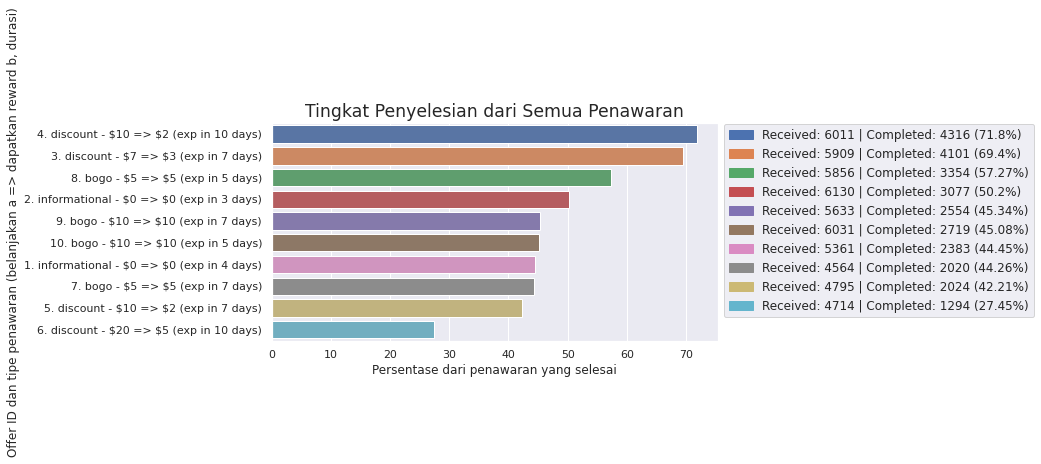

In [ ]:
# Plotting tingkat penawaran yang selesai
plt.figure(figsize=(8, 4))
sns.barplot(data=comp_by_offer, x='pct_completed', y='offer', orient='h')
plt.legend(handles=[plt.Rectangle((0,0), 1, 1, color=color) for color in sns.color_palette()[:10]],
           labels=comp_by_offer.summary.tolist(), fontsize='large', bbox_to_anchor=(1, 1.025))
plt.title('Tingkat Penyelesian dari Semua Penawaran', fontsize='xx-large')
plt.ylabel('Offer ID dan tipe penawaran (belanjakan a => dapatkan reward b, durasi)', fontsize='large')
plt.xlabel('Persentase dari penawaran yang selesai', fontsize='large');

##### Diagram batang di atas menunjukkan 10 penawaran berbeda dalam dataset - 4 BOGO, 4 diskon, dan 2 penawaran informasional. Ini tidak termasuk penawaran selesai yang tidak dilihat. Completion untuk penawaran informasional yang ditunjukkan di atas adalah penawaran informasional di mana pengguna melihat penawaran dan melakukan transaksi minimal 2,50 dolar dalam durasi tersebut. Berikut ini adalah ringkasan dari diagram di atas:
- Offer 4 - belanjakan 10 dolar untuk mendapatkan diskon 2 dolar yang berakhir dalam 10 hari - memiliki tingkat penyelesaian tertinggi pada 71,80% (4,316 dari 6,011 penawaran).
- Offer 6 - belanjakan 20 dolar untuk mendapatkan diskon 5 dolar yang berakhir dalam 10 hari - memiliki tingkat penyelesaian terendah pada 27,45% (1,294 dari 4,714 penawaran).
- Dalam memprediksi apakah suatu penawaran akan diselesaikan, kita dapat menyimpulkan bahwa jumlah `reward` tidak sepenting faktor `difficulty` atau `duration`.

##### Awalnya saya berasumsi bahwa penawaran bogo akan memiliki tingkat penyelesaian tertinggi karena pengguna mendapatkan reward 100% atas uang yang mereka keluarkan, tetapi ternyata bukan. Ini kemungkinan besar karena fakta bahwa penawaran bogo secara inheren lebih sulit untuk diselesaikan terlepas dari `duration` dan karena jumlah `difficulty` yang harus dihabiskan dalam satu transaksi untuk menyelesaikan penawaran.

##### Di sisi lain, penawaran diskon memungkinkan pengguna untuk mengakumulasi jumlah `difficulty` dengan beberapa transaksi. Misalnya, Offer 7 (belanjakan 10 dolar untuk mendapatkan diskon 2 dolar) akan selesai jika pengguna melakukan 4 transaksi kecil masing-masing 3 dolar karena transaksi ini terakumulasi menjadi lebih dari 10 dolar.

## Bagian IV: Exploratory Data Analysis - Users

### 1. Bagaimana distribusi demografi pengguna?

In [ ]:
# Menambahkan fitur "signup_year"
profile['signup_year'] = profile.signup_date.dt.year
profile.describe()

,age,income,user_id,signup_year
count,14825.000000,14825.000000,14825.000000,14825.000000
mean,54.393524,65404.991568,7413.000000,2016.620169
std,17.383705,21598.299410,4279.753206,1.198245
min,18.000000,30000.000000,1.000000,2013.000000
25%,42.000000,49000.000000,3707.000000,2016.000000
50%,55.000000,64000.000000,7413.000000,2017.000000
75%,66.000000,80000.000000,11119.000000,2017.000000
max,101.000000,120000.000000,14825.000000,2018.000000


In [ ]:
# fungsi untuk plotting data
def plot_user_demographics(user_df, title='Distribusi Demografi Pengguna',
                           height=600, width=1000, vspacing=0.15,
                           gender_col='gender', age_col='age',
                           signup_col='signup_year', income_col='income'):
    
    '''
    Plot the distribution of user demographics - `gender`, `age`, `signup year`, and `income`.
    
    Args:
        (1) user_df (Pandas dataframe) - user data
        (2) title (str) - plot title
        (3) height (int) - figure height
        (4) width (int) - figure width
        (5) vspacing (float) - vertical spacing between subplots
        (6) gender_col (str) - name of gender column
        (7) age_col (str) - name of age column
        (8) signup_col (str) - name of signup column
        (9) income_col (str) - name of income column
        
    Returns: None
    '''
    
    fig = subplots.make_subplots(2, 2, vertical_spacing=vspacing, y_title='Frekuensi',
                                 subplot_titles=['Gender', 'Age', 'Signup Year', 'Income'])
    fig.add_trace(go.Histogram(x=user_df[gender_col].sort_values(), name='Gender'), 1, 1) # gender
    fig.add_trace(go.Histogram(x=user_df[age_col], name='Age'), 1, 2) # age
    fig.add_trace(go.Histogram(x=user_df[signup_col], name='Signup Year'), 2, 1) # signup year
    fig.add_trace(go.Histogram(x=user_df[income_col], name='Income'), 2, 2) # income
    fig.update_layout(title=title, height=height, width=width, showlegend=False)
    fig.show()

In [ ]:
# Plotting demografi pengguna
plot_user_demographics(profile)

##### Ringkasan demografi pengguna:
- `Gender` - ada lebih banyak pengguna pria daripada wanita, dan sebagian kecil pengguna "other"
- `Age` - berkisar antara 18 hingga 100, dengan porsi pengguna tertinggi antara usia 50 dan 65
- `Signup year` - menunjukkan peningkatan pendaftaran dari tahun ke tahun dari 2013 ke 2017, lalu turun di tahun 2018
- `Income` - berkisar dari 30k hingga 120k, dengan porsi pengguna tertinggi antara 50k dan 75k

### 2. Apakah ada pola dalam user spending?

In [ ]:
# Kelompokkan usia dan pendapatan
profile['age_group'] = pd.qcut(profile.age, 5, labels=range(1, 6)).astype(int)
profile['income_group'] = pd.qcut(profile.income, 5, labels=range(1, 6)).astype(int)
profile.shape

(14825, 8)

In [ ]:
# Hitung jumlah total yang dibelanjakan oleh setiap pengguna
total_spent = transcript.groupby('user_id').amount.sum().reset_index()
profile = pd.merge(profile, total_spent, on='user_id', how='left')

# Kelompokkan "user spending" dari setiap pengguna
profile['spend_group'] = pd.qcut(profile.amount, 10, range(1, 11)).astype(int)
profile.sort_values('amount', ascending=False).head()

,gender,age,income,user_id,signup_date,signup_year,age_group,income_group,amount,spend_group
12951,M,77,97000,12952,2017-09-26,2017,5,5,1608.69,10
11767,M,32,64000,11768,2018-06-19,2018,1,3,1365.66,10
9404,F,36,71000,9405,2017-05-21,2017,1,4,1327.74,10
9293,M,53,103000,9294,2015-08-25,2015,3,5,1321.42,10
8987,M,50,86000,8988,2016-05-12,2016,2,5,1319.97,10


In [ ]:
# untuk memfilter informasi rata-rata income
inc_data = profile.query('gender == "M" and income_group == 5')
inc_data[['amount']].describe()

,amount
count,1134.00000
mean,187.42791
std,182.33897
min,0.00000
25%,91.62500
50%,152.76000
75%,224.24500
max,1608.69000


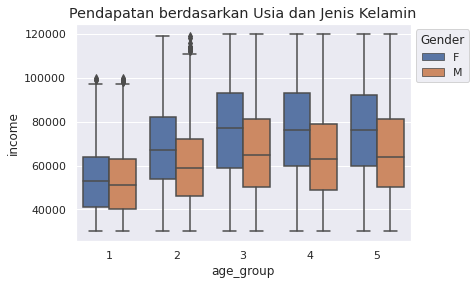

In [ ]:
# Plotting pendapatan menurut usia dan jenis kelamin
sns.boxplot(data=profile.query('gender != "O"'), x='age_group', y='income', hue='gender')
plt.title('Pendapatan berdasarkan Usia dan Jenis Kelamin', fontsize='x-large')
plt.legend(title='Gender', bbox_to_anchor=(1, 1));

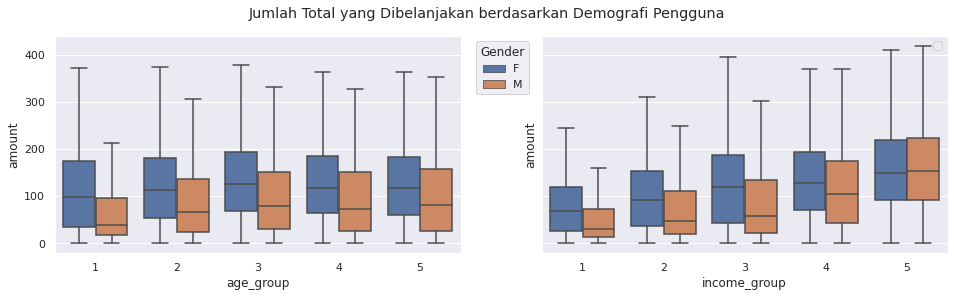

In [ ]:
# Box plot dengan warna
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 4))
fig.suptitle('Jumlah Total yang Dibelanjakan berdasarkan Demografi Pengguna', fontsize='x-large')
sns.boxplot(data=profile.query('gender != "O"'), x='age_group', y='amount', hue='gender', showfliers=False, ax=ax[0])
sns.boxplot(data=profile.query('gender != "O"'), x='income_group', y='amount', hue='gender', showfliers=False, ax=ax[1])
ax[0].legend(title='Gender', bbox_to_anchor=(1.025, 1))
ax[1].legend('');

In [ ]:
# Fungsi agregat untuk setiap fitur
agg_funcs = {
    'amount': 'mean', # avg amount spent
    'user_id': 'count', # num users
    'signup_year': 'median', # med signup year
    'gender': lambda g: (g == 'M').mean() * 100, # % male
    'age': 'mean', # avg age
    'income': 'mean', # avg income
}

# Hitung demografi pengguna berdasarkan pembelanjaan (10 kuantil)
spending_q10 = profile.groupby('spend_group').agg(agg_funcs).astype(int)
spending_q10.columns = ['avg_spent', 'n_users', 'median_signup', 'pct_male', 'avg_age', 'avg_income']
spending_q10['pct_female'] = 100 - spending_q10.pct_male
spending_q10

,avg_spent,n_users,median_signup,pct_male,avg_age,avg_income,pct_female
spend_group,,,,,,,
1,6,1483,2018,74,51,53942,26
2,18,1484,2018,75,49,53427,25
3,31,1482,2017,71,50,55855,29
4,50,1481,2017,62,52,60079,38
5,74,1483,2017,55,55,65341,45
6,100,1483,2017,49,56,68162,51
7,129,1481,2017,48,56,69490,52
8,161,1483,2016,47,56,71810,53
9,205,1482,2016,44,56,76542,56


In [ ]:
# Plotting perubahan dalam demografi pengguna saat pembelanjaan meningkat
fig = subplots.make_subplots(3, 2, vertical_spacing=0.1, x_title='Sumbu x = Spend Group',
                             subplot_titles=['Rata-rata Jumlah Total Pembelanjaan', 'Median Tahun Pendaftaran Pelanggan',
                                             'Rata-rata Pendapatan Pelanggan', 'Rata-rata Usia Pelanggan',
                                             'Persentase Pengguna Female', 'Persentase Pengguna Male'])
fig.add_trace(go.Scatter(x=spending_q10.index, y=spending_q10.avg_spent, name='Average amount spent'), 1, 1)
fig.add_trace(go.Scatter(x=spending_q10.index, y=spending_q10.median_signup, name='Median signup year'), 1, 2)
fig.add_trace(go.Scatter(x=spending_q10.index, y=spending_q10.avg_income, name='Average income'), 2, 1)
fig.add_trace(go.Scatter(x=spending_q10.index, y=spending_q10.avg_age, name='Average age'), 2, 2)
fig.add_trace(go.Scatter(x=spending_q10.index, y=spending_q10.pct_female, name='Percent female'), 3, 1)
fig.add_trace(go.Scatter(x=spending_q10.index, y=spending_q10.pct_male, name='Percent male'), 3, 2)

fig.update_layout(title='Pola Demografi Pengguna Pada Tiap Spend Group',
                  height=800, width=1000, showlegend=False)
fig.update_yaxes(nticks=3, row=1, col=2)
fig.show()

Text(0.5, 1.0, 'Korelasi Antar Variabel Pada Data Pengguna')

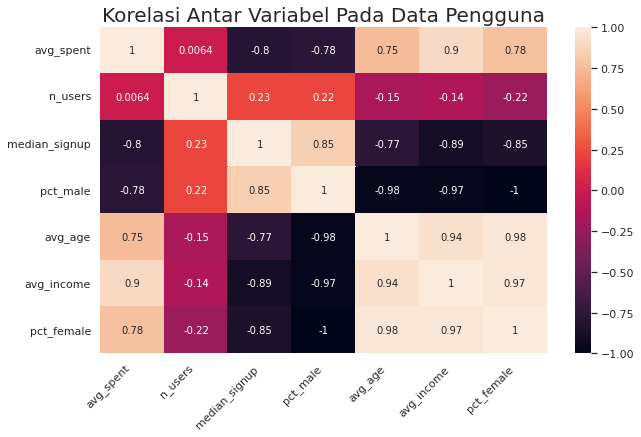

In [ ]:
# heatmap untuk mengetahui korelasi antar variabel
plt.figure(figsize=(10, 6))
sns.heatmap(spending_q10.corr(), annot=True)
plt.xticks(rotation=45, ha='right');
plt.title("Korelasi Antar Variabel Pada Data Pengguna", fontsize=20)

##### Pengguna dikelompokkan menjadi 10 kelompok berdasarkan jumlah total yang mereka belanjakan selama sebulan. Ada korelasi yang tinggi antara pembelanjaan pengguna dan setiap fitur demografis pengguna. Saat pembelanjaan meningkat, kita dapat melihat tren yang sebagian besar berkorelasi untuk setiap fitur: tahun pendaftaran dan persentase pengguna pria menurun, sedangkan usia dan pendapatan meningkat (sebagian besar). Dari heatmap di atas, saya dapat membuat kesimpulan tentang bagaimana berbagai jenis pengguna menghabiskan uang di aplikasi Starbucks:
- `Signup year` - pengguna yang telah menggunakan aplikasi lebih lama cenderung menghabiskan lebih banyak
- `Income` - pengguna yang memiliki pendapatan lebih banyak uang cenderung membelanjakan lebih banyak
- `Age` - pembelanjaan pengguna meningkat seiring bertambahnya usia hingga usia tertentu, dan kemudian pembelanjaan tersebut konsisten di paruh usia (50-an)
- `Gender` - pengguna wanita cenderung menghabiskan lebih banyak uang
    - Pengguna wanita sedikit lebih banyak daripada pengguna pria dalam kelompok pembelanjaan yang lebih tinggi. Dibandingkan dengan kelompok bawah, di mana pengguna pria 3 kali lebih banyak daripada pengguna wanita
    - Pola ini juga terlihat pada box plot di atas

### 3. Apakah ada pola demografis dalam offer completion?

In [ ]:
# Gabungkan user data dengan event data
offers = pd.merge(offers, profile.drop('amount', axis=1), on='user_id', how='left')

# Ekstraksi penawaran valid berdasarkan ID - "offer completed" yang belum dilihat tidak akan dihitung
true_offers = offers.query('event == "offer received" and group != 3')
true_offers.head()

,index,event,time,offer_id,user_id,amount,reward,difficulty,duration,offer_type,...,completed,group,gender,age,income,signup_date,signup_year,age_group,income_group,spend_group
0,0,offer received,0,7,2,0.0,5,5,7,bogo,...,1,4,F,75,100000,2017-05-09,2017,5,5,8
1,2,offer received,0,5,3,0.0,2,10,7,discount,...,0,2,M,68,70000,2018-04-26,2018,4,3,4
2,5,offer received,0,8,4,0.0,5,5,5,bogo,...,1,4,M,65,53000,2018-02-09,2018,4,2,3
3,7,offer received,0,1,5,0.0,0,0,4,informational,...,0,1,M,58,51000,2017-11-11,2017,3,2,2
4,8,offer received,0,6,6,0.0,5,20,10,discount,...,0,2,F,61,57000,2017-09-11,2017,4,2,5


In [ ]:
# fungsi untuk plotting
def plot_demographic_completion(data, hue, x='offer_id', y='completed'):
    
    '''
    Plot offer completion rate by a specified user demographic feature.
    
    Args:
        (1) data (Pandas dataframe) - data to plot
        (2) hue (str) - name of demographic feature column
        (3) x (str) - name of offer ID column
        (4) y (str) - name of completed indicator column
        
    Returns: None
    '''
    
    title = hue.replace("_", " ").title()
    plt.figure(figsize=(16, 4))
    sns.barplot(data=data, x=x, y=y, hue=hue)
    plt.title(f'Tingkat Penyelesaian Penawaran berdasarkan {title}', fontsize='xx-large')
    plt.ylabel('Persentase Penawaran Diselesaikan')
    plt.xlabel('Offer ID')
    plt.legend(title=title, bbox_to_anchor=(1, 1))
    plt.show()

Perhitungan untuk: gender
F    21763
M    32448
O      793
Name: offer_id, dtype: int64


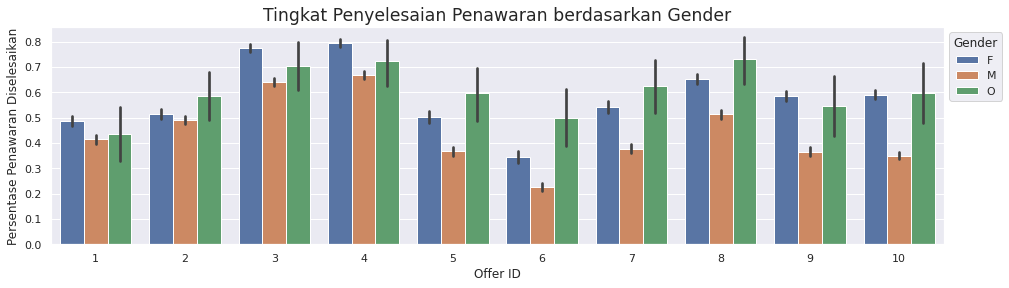

Perhitungan untuk: age_group
1    11776
2    11253
3    10565
4    10958
5    10452
Name: offer_id, dtype: int64


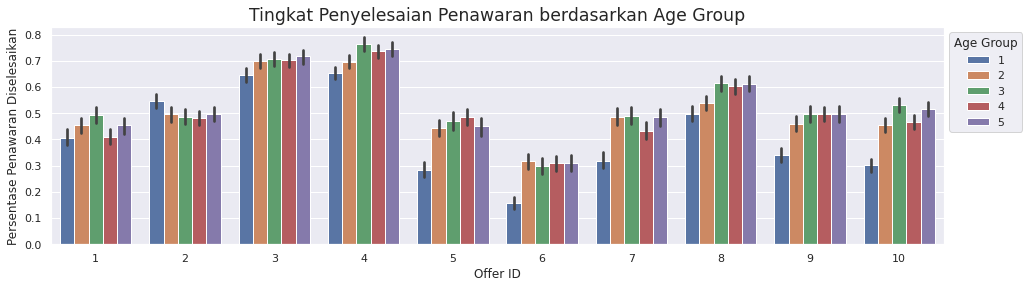

Perhitungan untuk: income_group
1    11840
2    11146
3    11719
4    10497
5     9802
Name: offer_id, dtype: int64


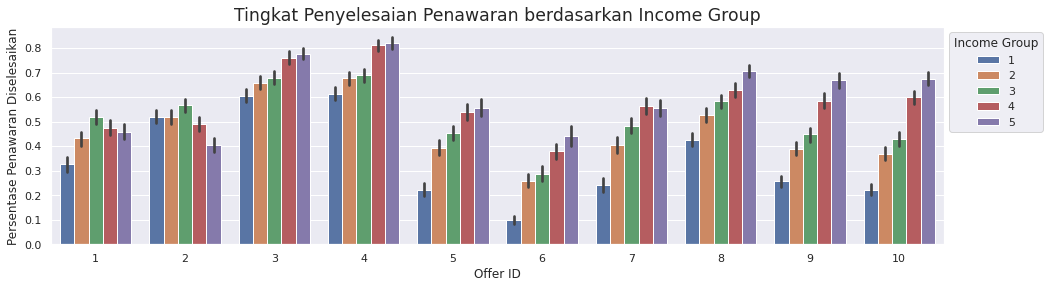

Perhitungan untuk: signup_year
2013     1050
2014     2577
2015     5640
2016    10402
2017    20760
2018    14575
Name: offer_id, dtype: int64


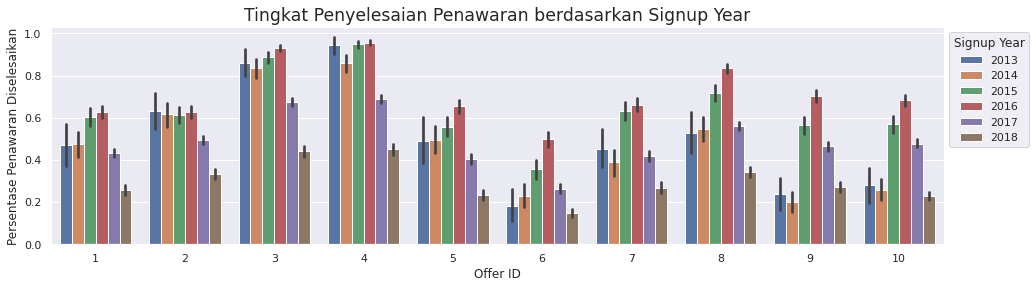

Perhitungan untuk: spend_group
1     6392
2     6185
3     5904
4     5720
5     5375
6     5102
7     4920
8     5115
9     5015
10    5276
Name: offer_id, dtype: int64


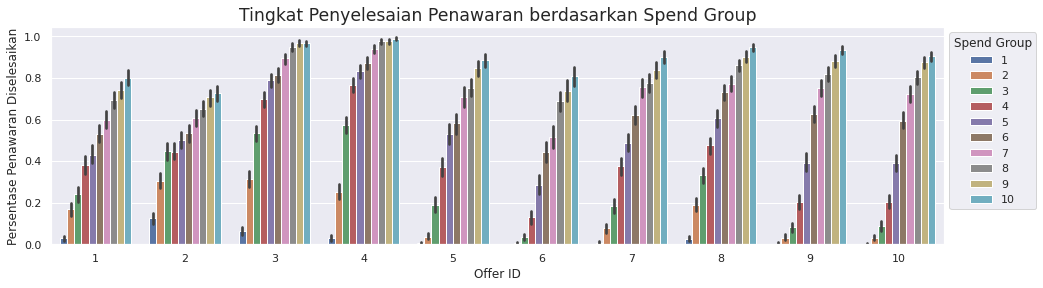

In [ ]:
# Plotting tingkat penyelesaian penawaran berdasarkan demografi pengguna
for feat in ['gender', 'age_group', 'income_group', 'signup_year', 'spend_group']:
    print('Perhitungan untuk:', true_offers.groupby(feat).offer_id.count())
    plot_demographic_completion(true_offers, feat)

##### Karena usia dan pendapatan adalah variabel dinamis, mereka dikelompokkan ke dalam 5 kuantil untuk memvisualisasikan bagaimana kelompok yang berbeda merespons terhadap penawaran: pengguna termuda berada di kelompok usia 1, pengguna tertua berada di kelompok usia 5, berpendapatan terendah berada di kelompok pendapatan 1, dan berpendapatan tertinggi berada pada kelompok pendapatan 5.

##### Penawaran diurutkan berdasarkan seberapa sulit pengguna bisa menyelesaikannya: 2 informasional, 4 diskon, dan 4 BOGO. Tidak ada batasan jumlah untuk penawaran informasional, dan penawaran diskon lebih mudah diselesaikan daripada penawaran bogo karena jumlahnya dapat diakumulasikan dengan lebih dari 1 transaksi. Selain itu, penawaran diurutkan dalam jenis dengan meningkatkan `difficulty` dan mengurangi `duration`. Dari bar plot di atas, kita dapat melihat dan membuat kesimpulan berikut:
- `Gender` - pengguna wanita memiliki tingkat penyelesaian yang lebih tinggi daripada pengguna pria untuk semua 10 penawaran
    - Perbedaan dalam tingkat penyelesaian penawaran antara pengguna pria dan wanita juga meningkat karena jenis penawaran semakin sulit untuk diselesaikan (informasional < diskon < bogo)
    - Secara umum, pengguna wanita lebih mungkin menyelesaikan penawaran dibandingkan pengguna pria
- `Age` - kelompok usia termuda memiliki tingkat penyelesaian terendah daripada empat kelompok lainnya
    - Perbedaannya lebih besar karena tingkat kesulitan penawaran
- `Income` - untuk sebagian besar, ada hubungan kuat antara pendapatan dan tingkat penyelesaian penawaran
    - Seperti halnya usia, perbedaan terbesar antara kelompok pendapatan 1 dan empat kelompok lainnya adalah tingkat kesulitan penawaran
    - Bisa jadi karena pengguna muda memperoleh penghasilan lebih sedikit, mereka membelanjakan lebih sedikit secara umum dan cenderung tidak menyelesaikan penawaran yang lebih sulit
- `Signup year` - pengguna yang mendaftar pada tahun 2016 memiliki tingkat penyelesaian tertinggi (diikuti oleh pengguna tahun 2015) dan pengguna yang mendaftar pada tahun 2018 memiliki tingkat penyelesaian terendah
    - Seperti yang dilihat pada subbagian sebelumnya, ada lebih banyak pengguna 2018 pada pembelanja yang lebih rendah sehingga mereka cenderung tidak menyelesaikan penawaran yang lebih sulit
    - Bisa jadi pengguna baru sedikit lebih ragu untuk membelanjakan uang di aplikasi dibandingkan dengan pengguna yang lebih lama
    - Kemungkinan lain adalah bahwa banyak dari pendaftaran 2018 adalah pengguna yang lebih muda (yang tidak menghabiskan banyak uang)

## Bagian V: Ringkasan

##### Dalam notebook ini, saya mencoba menyelesaikan masalah bisnis yang dihadapi dengan dataset yang relevan - `portfolio`, `profile`, dan `transcript`. Solusi yang saya usulkan adalah mengelompokkan pelanggan ke dalam kelompok demografis berdasarkan cara mereka menanggapi penawaran yang berbeda dan membangun pengklasifikasi yang dapat memprediksi apakah pelanggan akan menanggapi penawaran tertentu.

##### Saya mulai dengan berbagai langkah [pembersihan data dan praproses data] untuk mengubah data mentah menjadi format yang dapat digunakan. Ini termasuk menghapus data yang kosong, menghapus data duplikat, mengkonversi kolom ke tipe data yang sesuai, mengekstrak data dari kolom yang berisi list atau dictionary, dan memetakan penawaran dan string hash ID pengguna ke tipe data numerik agar lebih mudah diproses. Di atas 10% pengguna tidak memasukkan data demografis sehingga mereka dihapus seluruhnya, karena tujuan proyek ini adalah untuk mengelompokkan pengguna ke dalam grup demografis.

##### Notebook berikutnya (`IMPLEMENTASI ALGORITMA K-MEANS DENGAN PRINCIPAL COMPONENT ANALYSIS PADA SEGMENTASI PELANGGAN APLIKASI STARBUCKS BERDASARKAN INDIKATOR FREQUENCY, MONETARY, DAN TENURE - Segmentasi.ipynb`) akan melanjutkan progres dari sini dan fokus pada segmentasi pelanggan.

### Simpan data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
portfolio.to_pickle('/content/drive/My Drive/data/out-analysis/portfolio.pkl') # offer metadata
profile.to_pickle('/content/drive/My Drive/data/out-analysis/profile.pkl') # user data
transcript.reset_index().to_pickle('/content/drive/My Drive/data/out-analysis/transcript.pkl') # event data
offers.to_pickle('/content/drive/My Drive/data/out-analysis/offers.pkl') # transcript of offer-related events

print(portfolio.shape)
print(profile.shape)
print(transcript.shape)
print(offers.shape)

(10, 8)
(14825, 10)
(272388, 6)
(148431, 26)
